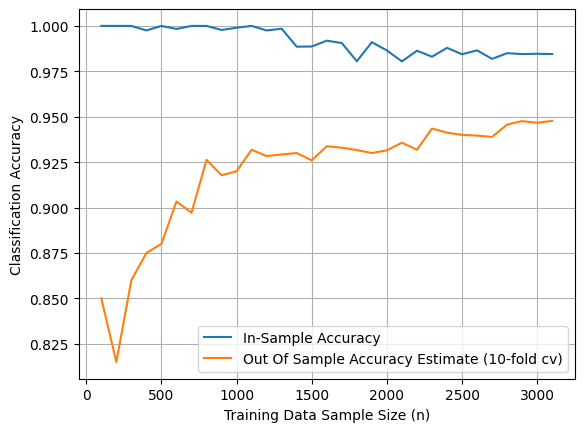

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

D = fetch_openml('dna', version=1, as_frame=False)
X = D.data
y = D.target

#Permute the data row indices, must also permute labels in the same order
total_samples = X.shape[0]
perm = np.random.permutation(total_samples)
X = X[perm]
y = y[perm]

sample_size = 100

sample_sizes = []
accuracies = []
cv_accuracies = []

while sample_size < total_samples:
  #The alpha parameter is all I changed between parts a and c
  clf = SGDClassifier()
  clf.fit(X[:sample_size], y[:sample_size])
  accuracies.append(clf.score(X[:sample_size], y[:sample_size]))
  # Must take the mean because we get a different accuracy using each fold as the test data!
  cv_accuracies.append(np.mean(cross_val_score(clf, X[:sample_size], y[:sample_size], cv = 10, scoring = "accuracy")))
  sample_sizes.append(sample_size)
  sample_size += 100

plt.plot(sample_sizes, accuracies, label="In-Sample Accuracy")
plt.plot(sample_sizes, cv_accuracies, label="Out Of Sample Accuracy Estimate (10-fold cv)")
plt.grid(True)
plt.xlabel("Training Data Sample Size (n)")
plt.ylabel("Classification Accuracy")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_data(N, Sigma, sigma, b):
  d = Sigma.shape[0]

  X = np.random.multivariate_normal(np.zeros(d), Sigma, size=N)

  delta = np.random.normal(0, sigma, size=(N, 1))

  y = X @ b + delta

  return X, y

d_values = np.arange(20, 121)

mse_train_values = []
mse_test_values = []

for d in d_values:
  mse_train_d = []
  mse_test_d = []
  for i in range(100):
    Sigma = np.identity(d)
    sigma = 0.2
    b = (1 / np.arange(1, d + 1)).reshape(-1, 1)
    X_train, y_train = create_data(100, Sigma, sigma, b)
    X_test, y_test = create_data(100, Sigma, sigma, b)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_train_d.append(mse_train)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_test_d.append(mse_test)

  mse_train_values.append(np.mean(mse_train_d))
  mse_test_values.append(np.mean(mse_test_d))

plt.plot(d_values, mse_train_values, label="In-Sample MSE")
plt.plot(d_values, mse_test_values, label="Out-Of-Sample MSE")
plt.xlabel("Effective Model Capacity (d)")
plt.ylabel("MSE")
plt.legend()
plt.show()



In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_data(N, Sigma, sigma, b):
  d = Sigma.shape[0]

  X = np.random.multivariate_normal(np.zeros(d), Sigma, size=N)

  delta = np.random.normal(0, sigma, size=(N, 1))

  y = X @ b + delta

  return X, y

d_values = np.arange(20, 121)

mse_train_values = []
mse_test_values = []

for d in d_values:
  mse_train_d = []
  mse_test_d = []
  for i in range(100):
    Sigma = np.identity(d)
    sigma = 0.2
    b = (1 / np.arange(1, d + 1)).reshape(-1, 1)
    X_train, y_train = create_data(100, Sigma, sigma, b)
    X_test, y_test = create_data(100, Sigma, sigma, b)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_train_d.append(mse_train)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_test_d.append(mse_test)

  mse_train_values.append(np.mean(mse_train_d))
  mse_test_values.append(np.mean(mse_test_d))

plt.plot(d_values[20:98], mse_test_values[20:98], label="Out-Of-Sample MSE")
plt.xlabel("Effective Model Capacity (d)")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def create_data(N, Sigma, sigma, b):
  d = Sigma.shape[0]

  X = np.random.multivariate_normal(np.zeros(d), Sigma, size=N)

  delta = np.random.normal(0, sigma, size=(N, 1))

  y = X @ b + delta

  return X, y

d_values = np.arange(20, 121)

mse_train_values = []
mse_test_values = []

for d in d_values:
  mse_train_d = []
  mse_test_d = []
  for i in range(100):
    Sigma = np.identity(d)
    sigma = 0.2
    b = (1 / np.arange(1, d + 1)).reshape(-1, 1)
    X_train, y_train = create_data(100, Sigma, sigma, b)
    X_test, y_test = create_data(100, Sigma, sigma, b)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_train_d.append(mse_train)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mse_test_d.append(mse_test)

  mse_train_values.append(np.mean(mse_train_d))
  mse_test_values.append(np.mean(mse_test_d))

plt.plot(d_values[105:121], mse_test_values[105:121], label="Out-Of-Sample MSE")
plt.xlabel("Effective Model Capacity (d)")
plt.ylabel("MSE")
plt.legend()
plt.show()

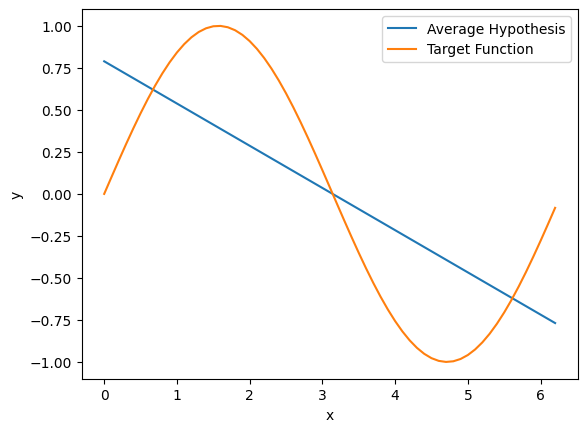

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def f(x):
  return np.sin(x)

def meanHypothesis(gs):
  intercepts = np.array([g.intercept_[0] for g in gs])
  coefs = np.array([g.coef_[0] for g in gs])
  meanIntercept = np.mean(intercepts)
  meanCoef = np.mean(coefs)
  return lambda u : meanIntercept + meanCoef*u

def biasSquared(gBar, testX):
  # Results of text hypothesis minus results from gold standard function f(x)=sin x
  return (gBar(testX) - f(testX))**2

def variance(gs, gBar, testX):
  return np.mean(np.array([(g.predict(np.array(testX).reshape(-1, 1)) - gBar(testX))**2 for g in gs]), axis = 0)

def expectedSquaredError(gs, testX):
  return np.mean(np.array([(g.predict(np.array(testX).reshape(-1, 1)) - f(testX))**2 for g in gs]), axis = 0)

num_datasets = 10000
D = np.random.uniform(0, 2*np.pi, size=(num_datasets, 2))
gs = []

#Fill up gs array with our trained models over every example
for example in D:
  model = Ridge(alpha = 0)
  model.fit(example.reshape(-1, 1), np.array([[np.sin(example[0])], [np.sin(example[1])]]))
  gs.append(model)

x_values = np.arange(0, 2 * np.pi, .1)
bias_values = []
variance_values = []
out_of_sample_errors = []
gBar = meanHypothesis(gs)

for x in x_values:
  bias_values.append(biasSquared(gBar, x))
  variance_values.append(variance(gs, gBar, x))
  out_of_sample_errors.append(expectedSquaredError(gs, x))

plt.plot(x_values, gBar(x_values), label="Average Hypothesis")
plt.plot(x_values, f(x_values), label="Target Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def f(x):
  return np.sin(x)

def meanHypothesis(gs):
  intercepts = np.array([g.intercept_[0] for g in gs])
  coefs = np.array([g.coef_[0] for g in gs])
  meanIntercept = np.mean(intercepts)
  meanCoef = np.mean(coefs)
  return lambda u : meanIntercept + meanCoef*u

def biasSquared(gBar, testX):
  # Results of test hypothesis minus results from target function f(x)=sin x
  return (gBar(testX) - f(testX))**2

def variance(gs, gBar, testX):
  return np.mean(np.array([(g.predict(np.array(testX).reshape(-1, 1)) - gBar(testX))**2 for g in gs]), axis = 0)

def expectedSquaredError(gs, testX):
  return np.mean(np.array([(g.predict(np.array(testX).reshape(-1, 1)) - f(testX))**2 for g in gs]), axis = 0)

num_datasets = 1000
D = np.random.uniform(0, 2*np.pi, size=(num_datasets, 2))
x_values = np.arange(0, 2 * np.pi, .1)
d_values = [-4, -3, -2, -1, 0, 1, 2, 3]
alpha_values = [10**i for i in d_values]
mean_bias_list = []
mean_var_list = []
mean_mse_list = []

for alpha in alpha_values:
  gs = []
  for example in D:
    model = Ridge(alpha = alpha)
    model.fit(example.reshape(-1, 1), np.array([[np.sin(example[0])], [np.sin(example[1])]]))
    gs.append(model)

  gBar = meanHypothesis(gs)

  bias_vals = np.array([biasSquared(gBar, x) for x in x_values])
  var_vals = np.array([variance(gs, gBar, x) for x in x_values])
  mse_vals = np.array([expectedSquaredError(gs, x) for x in x_values])

  mean_bias_list.append(np.mean(bias_vals))
  mean_var_list.append(np.mean(var_vals))
  mean_mse_list.append(np.mean(mse_vals))

# Convert lists to arrays for convenience
mean_mse_array = np.array(mean_mse_list)
alphas_array = np.array(alpha_values)

# Find the index of the minimum MSE
min_idx = np.argmin(mean_mse_array)

# Get corresponding alpha and MSE
best_alpha = alphas_array[min_idx]
best_mse = mean_mse_array[min_idx]

print(f"Lowest mean MSE = {best_mse:.4f} occurs at alpha = {best_alpha}")

Lowest mean MSE = 0.6609 occurs at alpha = 10.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def f(x):
  return np.sin(x)

def meanHypothesis(gs):
  intercepts = np.array([g.intercept_ for g in gs])
  coefs = np.array([g.coef_ for g in gs])
  meanIntercept = np.mean(intercepts)
  meanCoef = np.mean(coefs)
  return lambda u : meanIntercept + meanCoef*u

def biasSquared(gBar, testX):
  # Results of test hypothesis minus results from target function f(x)=sin x
  return (gBar(testX) - f(testX))**2

def variance(gs, gBar, testX):
  return np.mean(np.array([(g.predict(np.array(testX).reshape(-1, 1)) - gBar(testX))**2 for g in gs]), axis = 0)

def expectedSquaredError(gs, testX):
  return np.mean(np.array([(g.predict(np.array(testX).reshape(-1, 1)) - f(testX))**2 for g in gs]), axis = 0)

num_datasets = 1000
sample_sizes = [2, 4, 8, 16]

for size in sample_sizes:
  D = np.random.uniform(0, 2*np.pi, size=(num_datasets, size))
  gs = []
  for example in D:
    model = Ridge(alpha = 1)
    model.fit(example.reshape(-1, 1), np.array([np.sin(x) for x in example]))
    gs.append(model)

  gBar = meanHypothesis(gs)
  x_values = np.arange(0, 2 * np.pi, .1)
  biases = []
  variances = []
  out_of_sample_errors = []

  for x in x_values:
    biases.append(biasSquared(gBar, x))
    variances.append(variance(gs, gBar, x))
    out_of_sample_errors.append(expectedSquaredError(gs, x))

  print("Size: ", size)
  print("Mean Bias: ", np.mean(biases))
  print("Mean Variance: ", np.mean(variances))
  print("Mean Out of Sample Error: ", np.mean(out_of_sample_errors))


Size:  2
Mean Bias:  0.2649163686436396
Mean Variance:  0.49969906580308177
Mean Out of Sample Error:  0.7646154344467216
Size:  4
Mean Bias:  0.19952381842937547
Mean Variance:  0.23145199426911828
Mean Out of Sample Error:  0.4309758126984937
Size:  8
Mean Bias:  0.19865156632351638
Mean Variance:  0.0738454077531056
Mean Out of Sample Error:  0.272496974076622
Size:  16
Mean Bias:  0.1985457291018236
Mean Variance:  0.030006559940530673
Mean Out of Sample Error:  0.22855228904235428


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

D = fetch_openml('diabetes')
X = D.data
y = D.target

model = LogisticRegression(max_iter=5000)
model.fit(X, y)
cv_accuracies = cross_val_score(model, X, y, cv = 10, scoring = "accuracy")
print(f"Estimated out-of-sample error rate: {1 - np.mean(cv_accuracies):.4f}")


# We learned in class that coefficients can tell us the derivative of log odds over the derivative of the attribute
coefs = model.coef_[0]
feature_names = X.columns.tolist()
sensitivities = np.abs(coefs)

#Sort from highest to lowest and print highest ones
sorted_idx = np.argsort(sensitivities)[::-1]
for i in range(4):
    print(f"{i+1}. {feature_names[sorted_idx[i]]}: sensitivity = {sensitivities[sorted_idx[i]]:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=37
- version 5, status: active
  url: https://www.openml.org/search?type=data&id=42608

  warn(warning_msg)


Estimated out-of-sample error rate: 0.2265
1. pedi: sensitivity = 0.8678
2. preg: sensitivity = 0.1225
3. mass: sensitivity = 0.0897
4. plas: sensitivity = 0.0351


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression

D = fetch_openml('diabetes')
X = D.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = D.target

model = LogisticRegression()
model.fit(X_scaled, y)

coefs = model.coef_[0]
feature_names = X.columns.tolist()
sensitivities = np.abs(coefs)

sorted_idx = np.argsort(sensitivities)[::-1]
for i in range(4):
    print(f"{i+1}. {feature_names[sorted_idx[i]]}: sensitivity = {sensitivities[sorted_idx[i]]:.4f}")

1. plas: sensitivity = 1.1073
2. mass: sensitivity = 0.6964
3. preg: sensitivity = 0.4088
4. pedi: sensitivity = 0.3089


/usr/local/lib/python3.12/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=37
- version 5, status: active
  url: https://www.openml.org/search?type=data&id=42608

  warn(warning_msg)
